# **CSC 510 Assignment 1**

### This Jupyter Notebook file is about understanding the given carpet & hardwood datasets and board game data from 2017 & 2018, and extracting statistical information from them, then creating visualizations with that extracted data. All of the following processes and techniques are performed via Apache Spark.

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext, SparkFiles
import os
sc = SparkContext(master="spark://127.0.0.1:7077")

In [3]:
sc

<SparkContext master=spark://127.0.0.1:7077 appName=pyspark-shell>

In [4]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

## *Data from Carpet and Hardwood*

In [6]:
carpet = sqlContext.read.csv("../../data/CSC-510_Assignment1_Data/carpet.csv", inferSchema="true")
hardwood = sqlContext.read.csv("../../data/CSC-510_Assignment1_Data/hardwood.csv", inferSchema="true")

**These are the carpet and hardwood images that the datasets are derived from.**

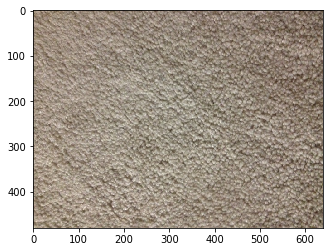

In [7]:
img = mpimg.imread("../../data/CSC-510_Assignment1_Data/carpet.jpeg")
plt.imshow(img)
plt.show()

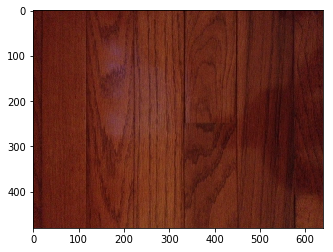

In [8]:
img = mpimg.imread("../../data/CSC-510_Assignment1_Data/hardwood.jpeg")
plt.imshow(img)
plt.show()

**The number of observations in both the carpet file and the hardwood file.**

In [9]:
print("Number of carpet.csv observations:", carpet.count())
print("Number of hardwood.csv observations:", hardwood.count())

Number of carpet.csv observations: 1024
Number of hardwood.csv observations: 1024


**Statistical information about each feature in the carpet & hardwood datasets.**

In [10]:
for c in carpet.columns:
    hardwood.describe([c]).show()

+-------+------------------+
|summary|               _c0|
+-------+------------------+
|  count|              1024|
|   mean| 99.28804687500005|
| stddev|17.921041151037915|
|    min|            47.124|
|    max|            139.61|
+-------+------------------+

+-------+------------------+
|summary|               _c1|
+-------+------------------+
|  count|              1024|
|   mean|  99.4323134765626|
| stddev|18.007255927201566|
|    min|            47.262|
|    max|             139.6|
+-------+------------------+

+-------+------------------+
|summary|               _c2|
+-------+------------------+
|  count|              1024|
|   mean| 99.56057226562486|
| stddev|18.023408179621303|
|    min|            48.485|
|    max|             139.9|
+-------+------------------+

+-------+------------------+
|summary|               _c3|
+-------+------------------+
|  count|              1024|
|   mean| 99.51893261718752|
| stddev|18.131449096920083|
|    min|            49.323|
|    max|  

+-------+------------------+
|summary|              _c32|
+-------+------------------+
|  count|              1024|
|   mean|  98.5583359375001|
| stddev|17.612143293546414|
|    min|            46.734|
|    max|            138.12|
+-------+------------------+

+-------+-----------------+
|summary|             _c33|
+-------+-----------------+
|  count|             1024|
|   mean|98.71522558593746|
| stddev|17.70450347767197|
|    min|           45.279|
|    max|           135.68|
+-------+-----------------+

+-------+------------------+
|summary|              _c34|
+-------+------------------+
|  count|              1024|
|   mean| 98.89421093750006|
| stddev|17.822052402135785|
|    min|            42.499|
|    max|            137.21|
+-------+------------------+

+-------+------------------+
|summary|              _c35|
+-------+------------------+
|  count|              1024|
|   mean| 98.86708203124984|
| stddev|17.737629807606762|
|    min|            45.096|
|    max|           

In [11]:
for h in hardwood.columns:
    hardwood.describe([h]).show()

+-------+------------------+
|summary|               _c0|
+-------+------------------+
|  count|              1024|
|   mean| 99.28804687500005|
| stddev|17.921041151037915|
|    min|            47.124|
|    max|            139.61|
+-------+------------------+

+-------+------------------+
|summary|               _c1|
+-------+------------------+
|  count|              1024|
|   mean|  99.4323134765626|
| stddev|18.007255927201566|
|    min|            47.262|
|    max|             139.6|
+-------+------------------+

+-------+------------------+
|summary|               _c2|
+-------+------------------+
|  count|              1024|
|   mean| 99.56057226562486|
| stddev|18.023408179621303|
|    min|            48.485|
|    max|             139.9|
+-------+------------------+

+-------+------------------+
|summary|               _c3|
+-------+------------------+
|  count|              1024|
|   mean| 99.51893261718752|
| stddev|18.131449096920083|
|    min|            49.323|
|    max|  

+-------+-----------------+
|summary|             _c33|
+-------+-----------------+
|  count|             1024|
|   mean|98.71522558593746|
| stddev|17.70450347767197|
|    min|           45.279|
|    max|           135.68|
+-------+-----------------+

+-------+------------------+
|summary|              _c34|
+-------+------------------+
|  count|              1024|
|   mean| 98.89421093750006|
| stddev|17.822052402135785|
|    min|            42.499|
|    max|            137.21|
+-------+------------------+

+-------+------------------+
|summary|              _c35|
+-------+------------------+
|  count|              1024|
|   mean| 98.86708203124984|
| stddev|17.737629807606762|
|    min|            45.096|
|    max|            138.15|
+-------+------------------+

+-------+------------------+
|summary|              _c36|
+-------+------------------+
|  count|              1024|
|   mean| 98.93905761718736|
| stddev|17.629947924309956|
|    min|            44.383|
|    max|           

In [12]:
print("Sample covariance of carpet columns '_c0' and '_c63': ", carpet.cov('_c0','_c63'))
print("Sample covariance of hardwood columns '_c0' and '_c63': ", hardwood.cov('_c0','_c63'))

Sample covariance of carpet columns '_c0' and '_c63':  75.78843696732771
Sample covariance of hardwood columns '_c0' and '_c63':  224.99707571143395


In [13]:
print("Correlation of carpet columns '_c0' and '_c63': ", carpet.corr('_c0','_c63'))
print("Correlation of hardwood columns '_c0' and '_c63': ", hardwood.corr('_c0','_c63'))

Correlation of carpet columns '_c0' and '_c63':  0.14816940064121403
Correlation of hardwood columns '_c0' and '_c63':  0.6828983058538755


**Visualizations of the mean and standard deviation values of carpet & hardwood files.**

In [14]:
from pyspark.sql import functions

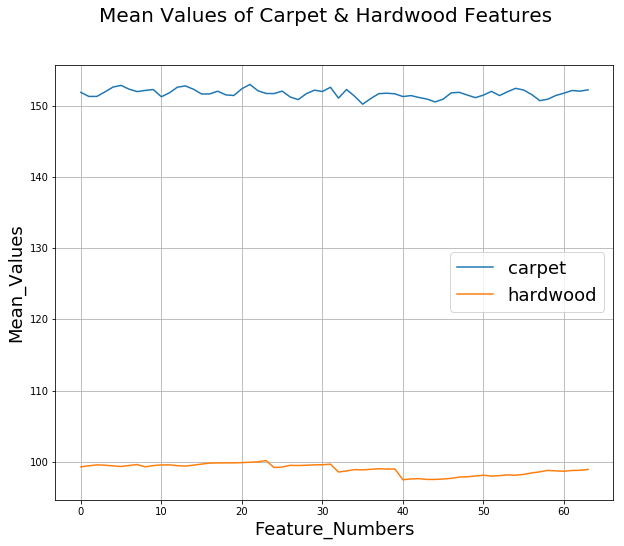

In [15]:
carpet_mean = [carpet.select(functions.mean(c)).collect()[0][0] for c in carpet.columns]
hardwood_mean = [hardwood.select(functions.mean(h)).collect()[0][0] for h in hardwood.columns]
plt.figure(figsize=(10,8)).suptitle('Mean Values of Carpet & Hardwood Features', fontsize=20)
plt.plot(range(len(carpet.columns)), carpet_mean, label="carpet")
plt.plot(range(len(hardwood.columns)), hardwood_mean, label="hardwood")
plt.xlabel("Feature_Numbers", fontsize=18)
plt.ylabel("Mean_Values", fontsize=18)
plt.grid(True)
plt.legend(fontsize=18)
plt.savefig("../../docs/CSC510_Assignment1_docs/carpethardwood_mean.jpeg")
plt.show()

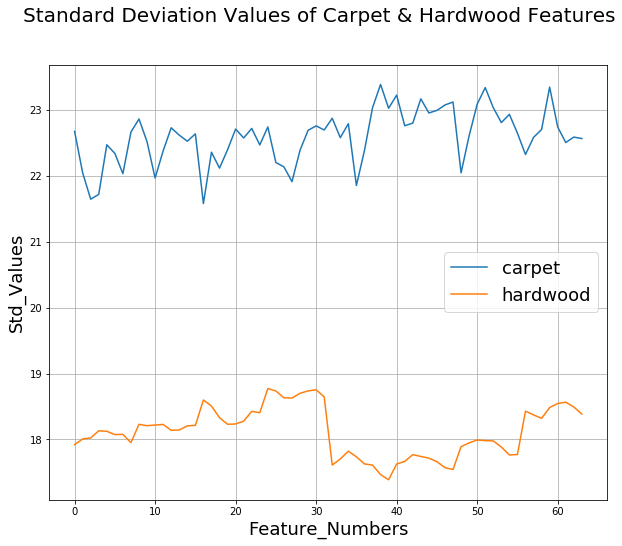

In [16]:
carpet_stddev = [carpet.select(functions.stddev(c)).collect()[0][0] for c in carpet.columns]
hardwood_stddev = [hardwood.select(functions.stddev(h)).collect()[0][0] for h in hardwood.columns]
plt.figure(figsize=(10,8)).suptitle('Standard Deviation Values of Carpet & Hardwood Features', fontsize=20)
plt.plot(range(len(carpet.columns)), carpet_stddev, label="carpet")
plt.plot(range(len(hardwood.columns)), hardwood_stddev, label="hardwood")
plt.xlabel("Feature_Numbers", fontsize=18)
plt.ylabel("Std_Values", fontsize=18)
plt.grid(True)
plt.legend(fontsize=18)
plt.savefig("../../docs/CSC510_Assignment1_docs/carpethardwood_stddev.jpeg")
plt.show()

**Histograms of the first feature, '_c0', of carpet & hardwood datasets.**

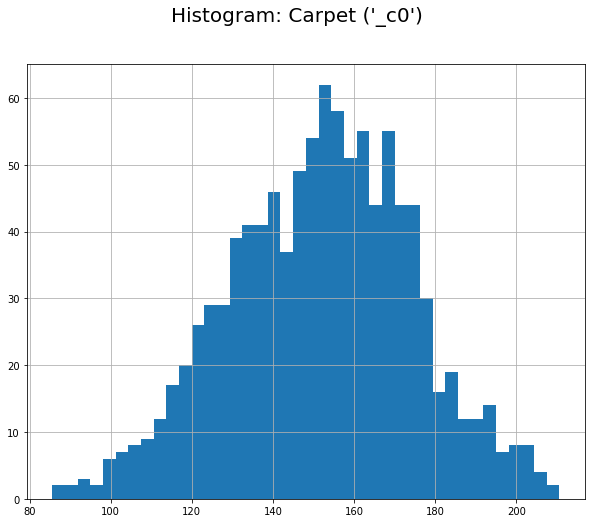

In [17]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Carpet ('_c0')", fontsize=20)
plt.hist([row["_c0"] for row in carpet.select(carpet["_c0"]).collect()], 40)
plt.grid(True)
plt.show()

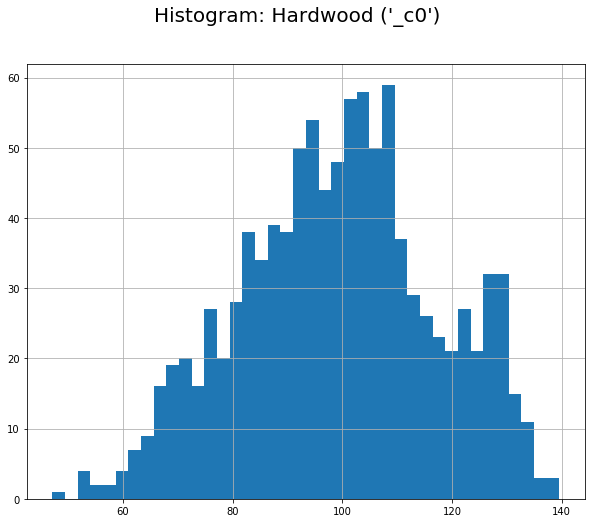

In [18]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Hardwood ('_c0')", fontsize=20)
plt.hist([row["_c0"] for row in hardwood.select(hardwood["_c0"]).collect()], 40)
plt.grid(True)
plt.show()

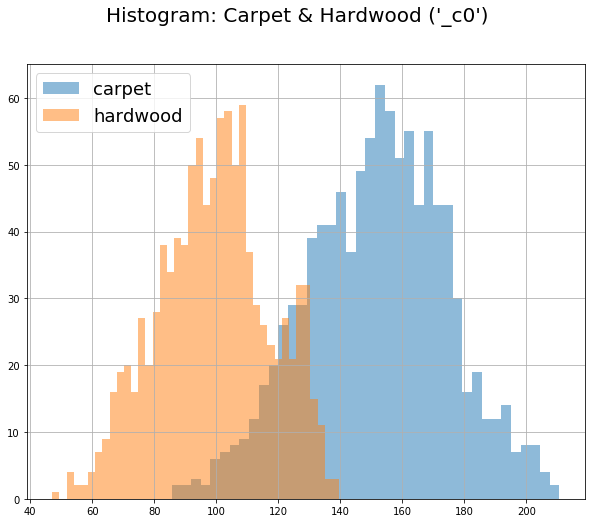

In [19]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Carpet & Hardwood ('_c0')", fontsize=20)
plt.hist([row["_c0"] for row in carpet.select(carpet["_c0"]).collect()], 40, alpha=0.5, label='carpet')
plt.hist([row["_c0"] for row in hardwood.select(hardwood["_c0"]).collect()], 40, alpha=0.5, label='hardwood')
plt.legend(fontsize=18)
plt.grid(True)
plt.savefig("../../docs/CSC510_Assignment1_docs/carpethardwood_hist01.jpeg")
plt.show()

**3D scatter-plot of the 1st, 54th, and 59th features of both carpet & hardwood datasets.**

This visually demonstrates that the observations of each set have similar feature values.

/home/oakleyjm/anaconda3/envs/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


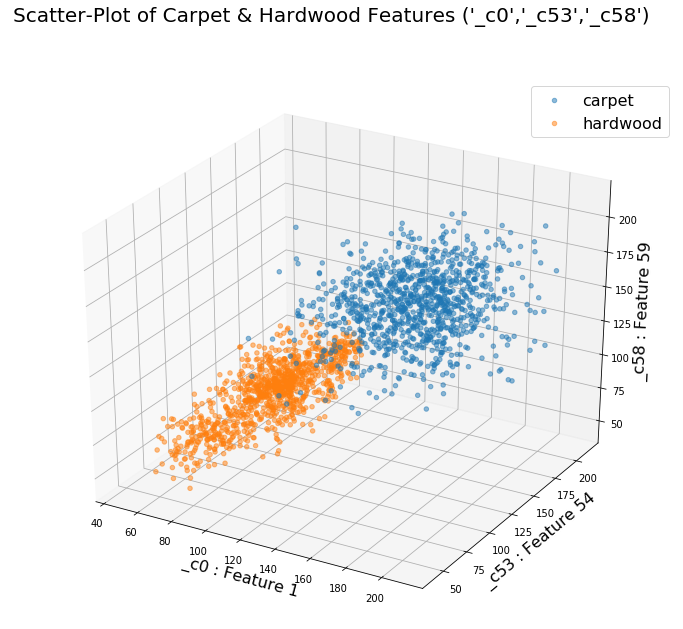

In [20]:
figure = plt.figure(figsize=(12,10))
ax = figure.add_subplot(111, projection='3d')
figure.suptitle("Scatter-Plot of Carpet & Hardwood Features ('_c0','_c53','_c58')", fontsize=20)

carpet_xdata = [row["_c0"] for row in carpet.select(carpet["_c0"]).collect()]
carpet_ydata = [row["_c53"] for row in carpet.select(carpet["_c53"]).collect()]
carpet_zdata = [row["_c58"] for row in carpet.select(carpet["_c58"]).collect()]

hardwood_xdata = [row["_c0"] for row in hardwood.select(hardwood["_c0"]).collect()]
hardwood_ydata = [row["_c53"] for row in hardwood.select(hardwood["_c53"]).collect()]
hardwood_zdata = [row["_c58"] for row in hardwood.select(hardwood["_c58"]).collect()]

ax.scatter(carpet_xdata, carpet_ydata, carpet_zdata, alpha=0.5, label='carpet')
ax.scatter(hardwood_xdata, hardwood_ydata, hardwood_zdata, alpha=0.5, label='hardwood')

ax.set_xlabel("_c0 : Feature 1", fontsize=16)
ax.set_ylabel("_c53 : Feature 54", fontsize=16)
ax.set_zlabel("_c58 : Feature 59",fontsize=16)
ax.legend(fontsize=16)
figure.savefig("../../docs/CSC510_Assignment1_docs/carpethardwood_3d01.jpeg")
figure.show()

**Normalize the features used in the previous 3D scatter-plot, then plot the histograms of the normalized first feature from carpet & hardwood datasets and the 3D scatter-plot of the three normalized features.**

In [21]:
norm_carpet_c0 = carpet.withColumn('norm_c0',
                                   (carpet._c0
                                    - carpet.select(functions.mean(carpet._c0)).collect()[0][0])
                                   / carpet.select(functions.stddev(carpet._c0)).collect()[0][0])
norm_hardwood_c0 = hardwood.withColumn('norm_c0',
                                       (hardwood._c0
                                        - hardwood.select(functions.mean(hardwood._c0)).collect()[0][0])
                                       / hardwood.select(functions.stddev(hardwood._c0)).collect()[0][0])

norm_carpet_c53 = carpet.withColumn('norm_c53',
                                   (carpet._c53
                                    - carpet.select(functions.mean(carpet._c53)).collect()[0][0])
                                   / carpet.select(functions.stddev(carpet._c53)).collect()[0][0])
norm_hardwood_c53 = hardwood.withColumn('norm_c53',
                                       (hardwood._c53
                                        - hardwood.select(functions.mean(hardwood._c53)).collect()[0][0])
                                       / hardwood.select(functions.stddev(hardwood._c53)).collect()[0][0])

norm_carpet_c58 = carpet.withColumn('norm_c58',
                                   (carpet._c58
                                    - carpet.select(functions.mean(carpet._c58)).collect()[0][0])
                                   / carpet.select(functions.stddev(carpet._c58)).collect()[0][0])
norm_hardwood_c58 = hardwood.withColumn('norm_c58',
                                       (hardwood._c58
                                        - hardwood.select(functions.mean(hardwood._c58)).collect()[0][0])
                                       / hardwood.select(functions.stddev(hardwood._c58)).collect()[0][0])

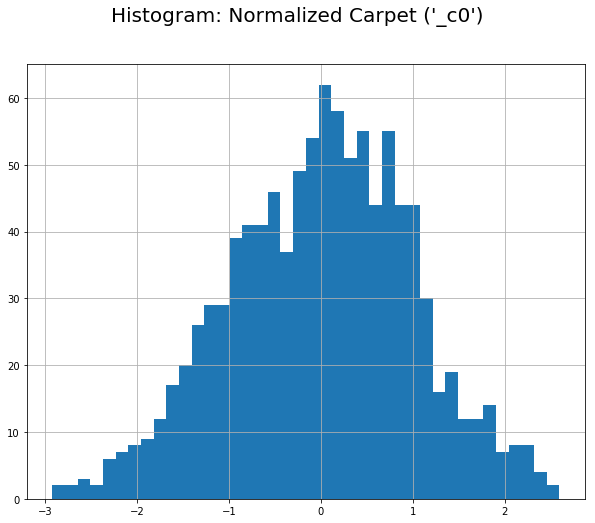

In [22]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Normalized Carpet ('_c0')", fontsize=20)
plt.hist([row["norm_c0"] for row in norm_carpet_c0.select(norm_carpet_c0["norm_c0"]).collect()], 40)
plt.grid(True)
plt.show()

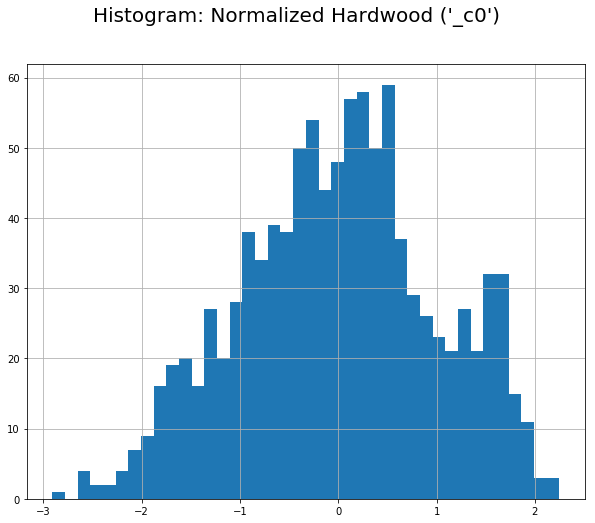

In [23]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Normalized Hardwood ('_c0')", fontsize=20)
plt.hist([row["norm_c0"] for row in norm_hardwood_c0.select(norm_hardwood_c0["norm_c0"]).collect()], 40)
plt.grid(True)
plt.show()

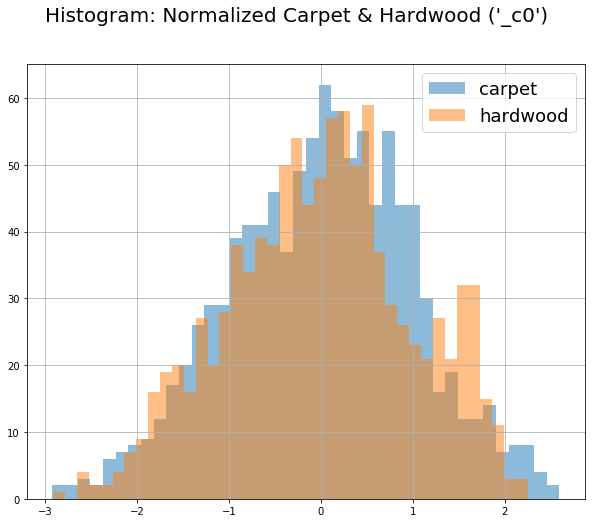

In [24]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Normalized Carpet & Hardwood ('_c0')", fontsize=20)
plt.hist([row["norm_c0"] for row in norm_carpet_c0.select(norm_carpet_c0["norm_c0"]).collect()], 40, alpha=0.5, label='carpet')
plt.hist([row["norm_c0"] for row in norm_hardwood_c0.select(norm_hardwood_c0["norm_c0"]).collect()], 40, alpha=0.5, label='hardwood')
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

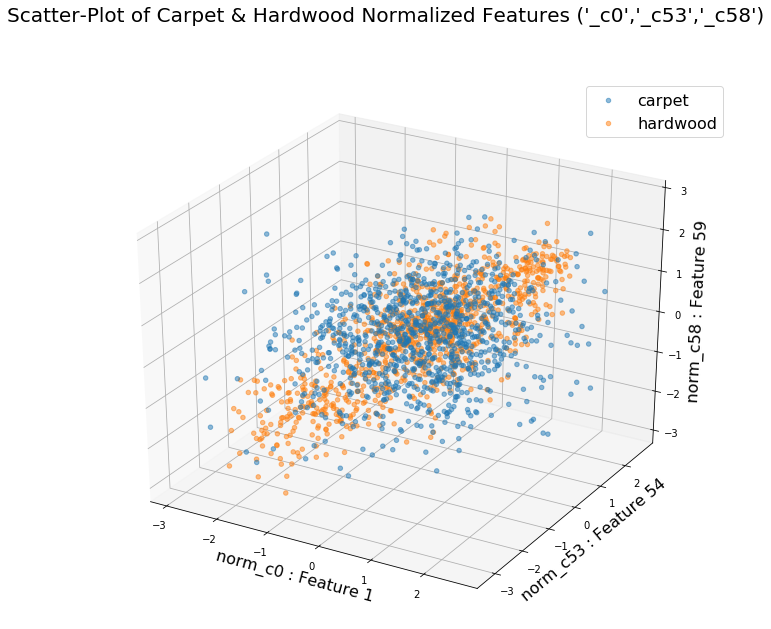

In [25]:
norm_figure = plt.figure(figsize=(12,10))
norm_ax = norm_figure.add_subplot(111, projection='3d')
norm_figure.suptitle("Scatter-Plot of Carpet & Hardwood Normalized Features ('_c0','_c53','_c58')", fontsize=20)

norm_carpet_xdata = [row["norm_c0"] for row in norm_carpet_c0.select(norm_carpet_c0["norm_c0"]).collect()]
norm_carpet_ydata = [row["norm_c53"] for row in norm_carpet_c53.select(norm_carpet_c53["norm_c53"]).collect()]
norm_carpet_zdata = [row["norm_c58"] for row in norm_carpet_c58.select(norm_carpet_c58["norm_c58"]).collect()]

norm_hardwood_xdata = [row["norm_c0"] for row in norm_hardwood_c0.select(norm_hardwood_c0["norm_c0"]).collect()]
norm_hardwood_ydata = [row["norm_c53"] for row in norm_hardwood_c53.select(norm_hardwood_c53["norm_c53"]).collect()]
norm_hardwood_zdata = [row["norm_c58"] for row in norm_hardwood_c58.select(norm_hardwood_c58["norm_c58"]).collect()]

norm_ax.scatter(norm_carpet_xdata, norm_carpet_ydata, norm_carpet_zdata, alpha=0.5, label='carpet')
norm_ax.scatter(norm_hardwood_xdata, norm_hardwood_ydata, norm_hardwood_zdata, alpha=0.5, label='hardwood')

norm_ax.set_xlabel("norm_c0 : Feature 1", fontsize=16)
norm_ax.set_ylabel("norm_c53 : Feature 54", fontsize=16)
norm_ax.set_zlabel("norm_c58 : Feature 59",fontsize=16)

norm_ax.legend(fontsize=16)
norm_figure.show()

**Standardize the features used in the previous 3D scatter-plot, then plot the histograms of the standardized first feature from carpet & hardwood datasets and the 3D scatter-plot of the three standardized features.**

In [26]:
alpha = 0.00001
std_carpet_c0 = norm_carpet_c0.withColumn('std_c0',
                                          (alpha*norm_carpet_c0.select(functions.mean(norm_carpet_c0.norm_c0)).collect()[0][0])
                                          + ((norm_carpet_c0.norm_c0
                                              - norm_carpet_c0.select(functions.mean(norm_carpet_c0.norm_c0)).collect()[0][0])
                                             / (1 + norm_carpet_c0.select(functions.stddev(norm_carpet_c0.norm_c0)).collect()[0][0])))
std_hardwood_c0 = norm_hardwood_c0.withColumn('std_c0',
                                              (alpha*norm_hardwood_c0.select(functions.mean(norm_hardwood_c0.norm_c0)).collect()[0][0])
                                              + ((norm_hardwood_c0.norm_c0
                                                  - norm_hardwood_c0.select(functions.mean(norm_hardwood_c0.norm_c0)).collect()[0][0])
                                                 / (1 + norm_hardwood_c0.select(functions.stddev(norm_hardwood_c0.norm_c0)).collect()[0][0])))

std_carpet_c53 = norm_carpet_c53.withColumn('std_c53',
                                            (alpha*norm_carpet_c53.select(functions.mean(norm_carpet_c53.norm_c53)).collect()[0][0])
                                            + ((norm_carpet_c53.norm_c53
                                                - norm_carpet_c53.select(functions.mean(norm_carpet_c53.norm_c53)).collect()[0][0])
                                               / (1 + norm_carpet_c53.select(functions.stddev(norm_carpet_c53.norm_c53)).collect()[0][0])))
std_hardwood_c53 = norm_hardwood_c53.withColumn('std_c53',
                                              (alpha*norm_hardwood_c53.select(functions.mean(norm_hardwood_c53.norm_c53)).collect()[0][0])
                                              + ((norm_hardwood_c53.norm_c53
                                                  - norm_hardwood_c53.select(functions.mean(norm_hardwood_c53.norm_c53)).collect()[0][0])
                                                 / (1 + norm_hardwood_c53.select(functions.stddev(norm_hardwood_c53.norm_c53)).collect()[0][0])))

std_carpet_c58 = norm_carpet_c58.withColumn('std_c58',
                                            (alpha*norm_carpet_c58.select(functions.mean(norm_carpet_c58.norm_c58)).collect()[0][0])
                                            + ((norm_carpet_c58.norm_c58
                                                - norm_carpet_c58.select(functions.mean(norm_carpet_c58.norm_c58)).collect()[0][0])
                                               / (1 + norm_carpet_c58.select(functions.stddev(norm_carpet_c58.norm_c58)).collect()[0][0])))
std_hardwood_c58 = norm_hardwood_c58.withColumn('std_c58',
                                              (alpha*norm_hardwood_c58.select(functions.mean(norm_hardwood_c58.norm_c58)).collect()[0][0])
                                              + ((norm_hardwood_c58.norm_c58
                                                  - norm_hardwood_c58.select(functions.mean(norm_hardwood_c58.norm_c58)).collect()[0][0])
                                                 / (1 + norm_hardwood_c58.select(functions.stddev(norm_hardwood_c58.norm_c58)).collect()[0][0])))

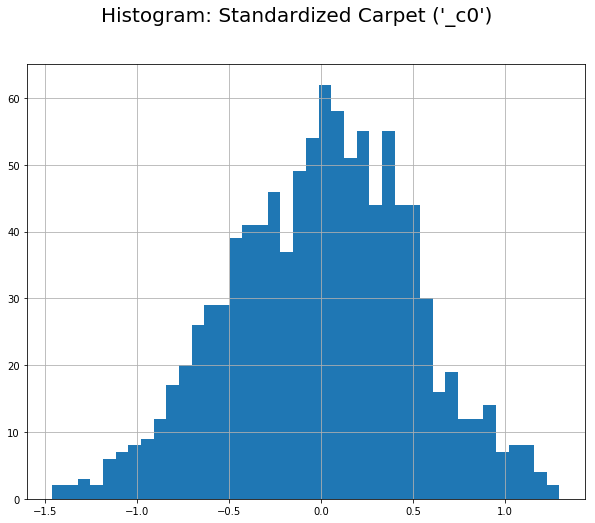

In [27]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Standardized Carpet ('_c0')", fontsize=20)
plt.hist([row["std_c0"] for row in std_carpet_c0.select(std_carpet_c0["std_c0"]).collect()], 40)
plt.grid(True)
plt.show()

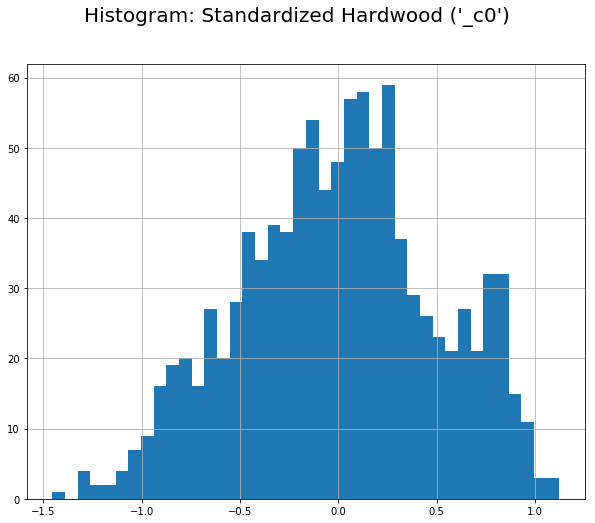

In [28]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Standardized Hardwood ('_c0')", fontsize=20)
plt.hist([row["std_c0"] for row in std_hardwood_c0.select(std_hardwood_c0["std_c0"]).collect()], 40)
plt.grid(True)
plt.show()

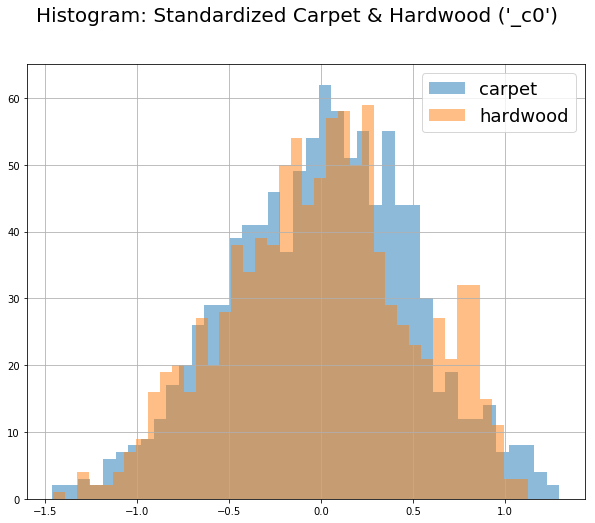

In [29]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Standardized Carpet & Hardwood ('_c0')", fontsize=20)
plt.hist([row["std_c0"] for row in std_carpet_c0.select(std_carpet_c0["std_c0"]).collect()], 40, alpha=0.5, label='carpet')
plt.hist([row["std_c0"] for row in std_hardwood_c0.select(std_hardwood_c0["std_c0"]).collect()], 40, alpha=0.5, label='hardwood')
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

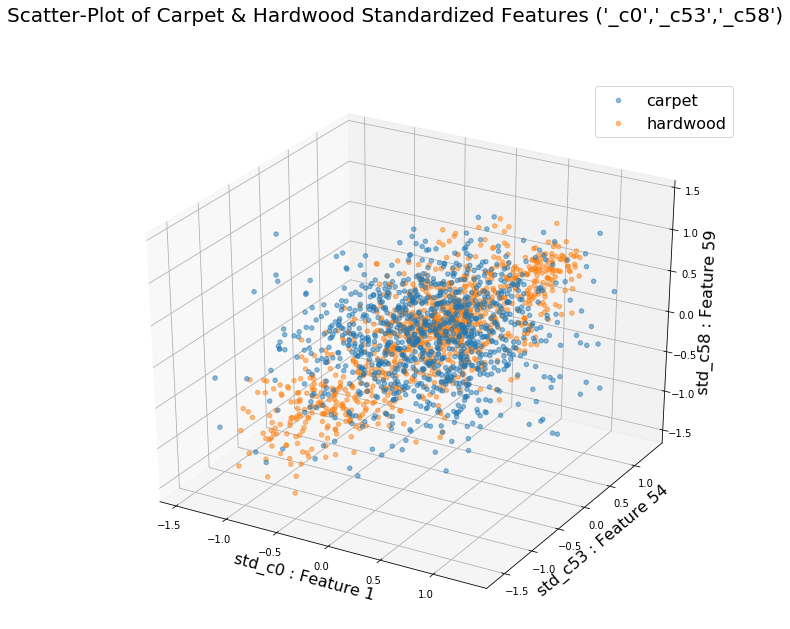

In [30]:
std_figure = plt.figure(figsize=(12,10))
std_ax = std_figure.add_subplot(111, projection='3d')
std_figure.suptitle("Scatter-Plot of Carpet & Hardwood Standardized Features ('_c0','_c53','_c58')", fontsize=20)

std_carpet_xdata = [row["std_c0"] for row in std_carpet_c0.select(std_carpet_c0["std_c0"]).collect()]
std_carpet_ydata = [row["std_c53"] for row in std_carpet_c53.select(std_carpet_c53["std_c53"]).collect()]
std_carpet_zdata = [row["std_c58"] for row in std_carpet_c58.select(std_carpet_c58["std_c58"]).collect()]

std_hardwood_xdata = [row["std_c0"] for row in std_hardwood_c0.select(std_hardwood_c0["std_c0"]).collect()]
std_hardwood_ydata = [row["std_c53"] for row in std_hardwood_c53.select(std_hardwood_c53["std_c53"]).collect()]
std_hardwood_zdata = [row["std_c58"] for row in std_hardwood_c58.select(std_hardwood_c58["std_c58"]).collect()]

std_ax.scatter(std_carpet_xdata, std_carpet_ydata, std_carpet_zdata, alpha=0.5, label='carpet')
std_ax.scatter(std_hardwood_xdata, std_hardwood_ydata, std_hardwood_zdata, alpha=0.5, label='hardwood')

std_ax.set_xlabel("std_c0 : Feature 1", fontsize=16)
std_ax.set_ylabel("std_c53 : Feature 54", fontsize=16)
std_ax.set_zlabel("std_c58 : Feature 59",fontsize=16)

std_ax.legend(fontsize=16)
std_figure.savefig("../../docs/CSC510_Assignment1_docs/carpethardwood_3d02.jpeg")
std_figure.show()

**2D scatter-plots of the original, normalized, and standardized versions of the 1st, 54th, and 59th features from the carpet & hardwood datasets.**

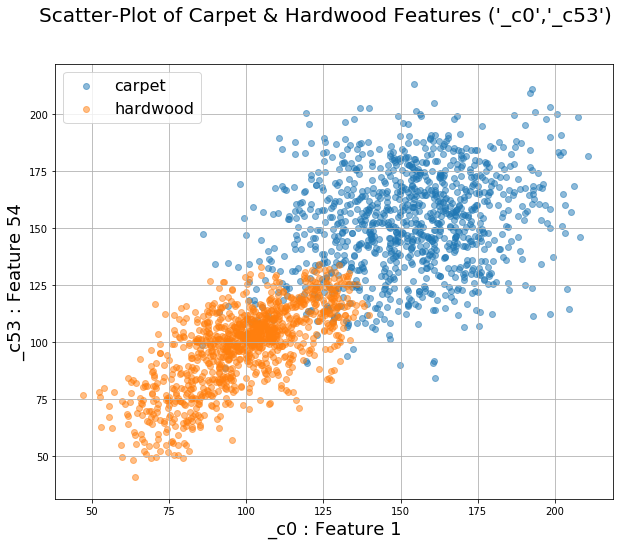

In [31]:
plt.figure(figsize=(10,8)).suptitle("Scatter-Plot of Carpet & Hardwood Features ('_c0','_c53')", fontsize=20)
plt.scatter(carpet_xdata, carpet_ydata, alpha=0.5, label='carpet')
plt.scatter(hardwood_xdata, hardwood_ydata, alpha=0.5, label='hardwood')
plt.xlabel("_c0 : Feature 1", fontsize=18)
plt.ylabel("_c53 : Feature 54", fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

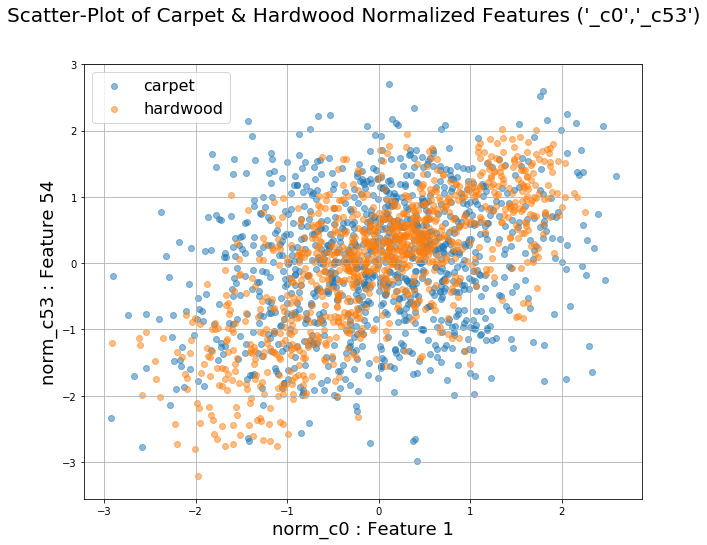

In [32]:
plt.figure(figsize=(10,8)).suptitle("Scatter-Plot of Carpet & Hardwood Normalized Features ('_c0','_c53')", fontsize=20)
plt.scatter(norm_carpet_xdata, norm_carpet_ydata, alpha=0.5, label='carpet')
plt.scatter(norm_hardwood_xdata, norm_hardwood_ydata, alpha=0.5, label='hardwood')
plt.xlabel("norm_c0 : Feature 1", fontsize=18)
plt.ylabel("norm_c53 : Feature 54", fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

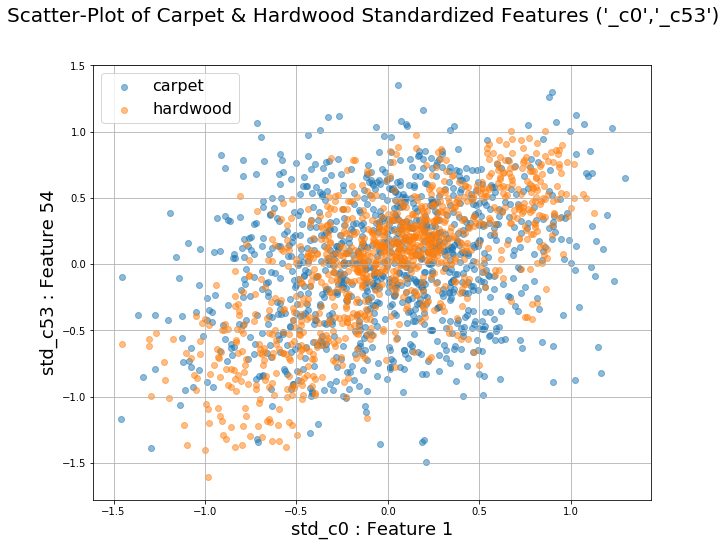

In [33]:
plt.figure(figsize=(10,8)).suptitle("Scatter-Plot of Carpet & Hardwood Standardized Features ('_c0','_c53')", fontsize=20)
plt.scatter(std_carpet_xdata, std_carpet_ydata, alpha=0.5, label='carpet')
plt.scatter(std_hardwood_xdata, std_hardwood_ydata, alpha=0.5, label='hardwood')
plt.xlabel("std_c0 : Feature 1", fontsize=18)
plt.ylabel("std_c53 : Feature 54", fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

**Classify carpet data with label 0 and hardwood data with label 1, then merge and save the labeled data to a CSV file called 'carwood.csv'.**

In [34]:
from pyspark.sql.functions import lit
carpet = carpet.withColumn('Label', lit(0))
hardwood = hardwood.withColumn('Label', lit(1))

In [35]:
carwood = carpet.union(hardwood)
carwood.toPandas().to_csv('../../data/CSC-510_Assignment1_Data/carwood.csv')

**Shuffle merged data rows and save it to a CSV file called 'randcarwood.csv'.**

In [36]:
randcarwood = carwood.orderBy(functions.rand())
randcarwood.toPandas().to_csv('../../data/CSC-510_Assignment1_Data/randcarwood.csv')

**Split the randomized, merged data rows into two different datasets (using a 80:20 ratio), then save the two datasets to two different CSV files, with their respective filenames being 'Trainrandcarwood80.csv' and 'Testrandcarwood20.csv'.**

In [37]:
trainrandcarwood80, testrandcarwood20 = randcarwood.randomSplit([0.8, 0.2], 12345)

In [38]:
print("Size of Trainrandcarwood80:",trainrandcarwood80.count())
print("Size of Testrandcarwood20:",testrandcarwood20.count())

Size of Trainrandcarwood80: 1622
Size of Testrandcarwood20: 426


In [39]:
trainrandcarwood80.toPandas().to_csv('../../data/CSC-510_Assignment1_Data/Trainrandcarwood80.csv')
testrandcarwood20.toPandas().to_csv('../../data/CSC-510_Assignment1_Data/Testrandcarwood20.csv')

## *Data from Board Game Data of 2017 and 2018*

In [40]:
bgg_2017 = sqlContext.read.csv("../../data/CSC-510_Assignment1_Data/bgg_db_2017_04.csv", inferSchema="true", header=True)
bgg_2018 = sqlContext.read.csv("../../data/CSC-510_Assignment1_Data/bgg_db_2018_01.csv", inferSchema="true", header=True)

**The number of observations and the column names in both the bgg_db_2017 file and the bgg_db_2018 file.**

In [41]:
print("Number of bgg_db_2017_04.csv observations:", bgg_2017.count())
print("Number of bgg_db_2018_01.csv observations:", bgg_2018.count())

Number of bgg_db_2017_04.csv observations: 4999
Number of bgg_db_2018_01.csv observations: 4999


In [42]:
print("Columns and column types of bgg_db_2017_04.csv:", bgg_2017)
print("Columns and column types of bgg_db_2018_01.csv:", bgg_2018)

Columns and column types of bgg_db_2017_04.csv: DataFrame[rank: int, bgg_url: string, game_id: int, names: string, min_players: int, max_players: int, avg_time: int, min_time: int, max_time: int, year: int, avg_rating: double, geek_rating: double, num_votes: int, image_url: string, age: int, mechanic: string, owned: int, category: string, designer: string, weight: string]
Columns and column types of bgg_db_2018_01.csv: DataFrame[rank: int, bgg_url: string, game_id: int, names: string, min_players: int, max_players: int, avg_time: int, min_time: int, max_time: int, year: int, avg_rating: double, geek_rating: double, num_votes: int, image_url: string, age: int, mechanic: string, owned: int, category: string, designer: string, weight: string]


**Statistical information about each feature in the bgg_2017 & bgg_2018 datasets.**

In [43]:
bgg_2017_feats = [dt[0] for dt in bgg_2017.dtypes if dt[1] == 'int' or dt[1] == 'double']
bgg_2018_feats = [dt[0] for dt in bgg_2018.dtypes if dt[1] == 'int' or dt[1] == 'double']
del bgg_2017_feats[0:2]
del bgg_2018_feats[0:2]

In [44]:
for col in bgg_2017_feats:
    bgg_2017.describe([col]).show()

+-------+------------------+
|summary|       min_players|
+-------+------------------+
|  count|              4999|
|   mean| 2.034606921384277|
| stddev|0.6761549191642312|
|    min|                 0|
|    max|                 8|
+-------+------------------+

+-------+------------------+
|summary|       max_players|
+-------+------------------+
|  count|              4999|
|   mean| 5.287257451490298|
| stddev|15.780212473291137|
|    min|                 0|
|    max|               999|
+-------+------------------+

+-------+------------------+
|summary|          avg_time|
+-------+------------------+
|  count|              4999|
|   mean|105.55751150230046|
| stddev|390.59786240984005|
|    min|                 0|
|    max|             17280|
+-------+------------------+

+-------+------------------+
|summary|          min_time|
+-------+------------------+
|  count|              4999|
|   mean| 87.33166633326665|
| stddev|318.08646626263686|
|    min|                 0|
|    max|  

In [45]:
for col in bgg_2018_feats:
    bgg_2018.describe([col]).show()

+-------+------------------+
|summary|       min_players|
+-------+------------------+
|  count|              4999|
|   mean|2.0272054410882174|
| stddev|0.6819428351515733|
|    min|                 0|
|    max|                 8|
+-------+------------------+

+-------+------------------+
|summary|       max_players|
+-------+------------------+
|  count|              4999|
|   mean|  5.37747549509902|
| stddev|16.075742986038648|
|    min|                 0|
|    max|               999|
+-------+------------------+

+-------+------------------+
|summary|          avg_time|
+-------+------------------+
|  count|              4999|
|   mean|115.24164832966594|
| stddev|509.80284070640505|
|    min|                 0|
|    max|             22500|
+-------+------------------+

+-------+------------------+
|summary|          min_time|
+-------+------------------+
|  count|              4999|
|   mean| 85.14802960592118|
| stddev|317.58740591493347|
|    min|                 0|
|    max|  

In [46]:
print("Sample covariance of bgg_2017 columns 'avg_rating' and 'geek_rating': ",
      bgg_2017.cov('avg_rating','geek_rating'))
print("Sample covariance of bgg_2018 columns 'avg_rating' and 'geek_rating': ",
      bgg_2018.cov('avg_rating','geek_rating'))

Sample covariance of bgg_2017 columns 'avg_rating' and 'geek_rating':  0.1241304785427621
Sample covariance of bgg_2018 columns 'avg_rating' and 'geek_rating':  0.12640684420658413


In [47]:
print("Correlation of bgg_2017 columns 'avg_rating' and 'geek_rating': ",
      bgg_2017.corr('avg_rating','geek_rating'))
print("Correlation of bgg_2018 columns 'avg_rating' and 'geek_rating': ",
      bgg_2018.corr('avg_rating','geek_rating'))

Correlation of bgg_2017 columns 'avg_rating' and 'geek_rating':  0.45707447347223007
Correlation of bgg_2018 columns 'avg_rating' and 'geek_rating':  0.46714680428631694


**Visualizations of the mean and standard deviation values of carpet & hardwood files.**

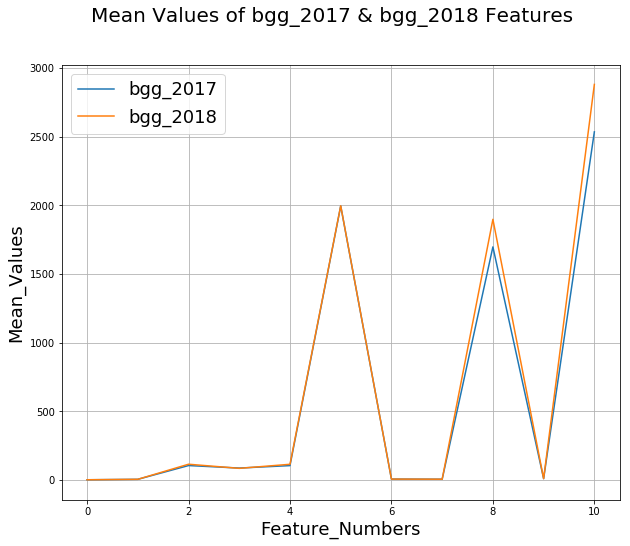

In [48]:
bgg_2017_mean = [bgg_2017.select(functions.mean(x)).collect()[0][0] for x in bgg_2017_feats]
bgg_2018_mean = [bgg_2018.select(functions.mean(x)).collect()[0][0] for x in bgg_2018_feats]
plt.figure(figsize=(10,8)).suptitle("Mean Values of bgg_2017 & bgg_2018 Features", fontsize=20)
plt.plot(range(len(bgg_2017_feats)), bgg_2017_mean, label="bgg_2017")
plt.plot(range(len(bgg_2018_feats)), bgg_2018_mean, label="bgg_2018")
plt.xlabel("Feature_Numbers", fontsize=18)
plt.ylabel("Mean_Values", fontsize=18)
plt.autoscale(enable=True,axis='both',tight=False)
plt.grid(True)
plt.legend(fontsize=18)
plt.savefig("../../docs/CSC510_Assignment1_docs/bgg_mean.jpeg")
plt.show()

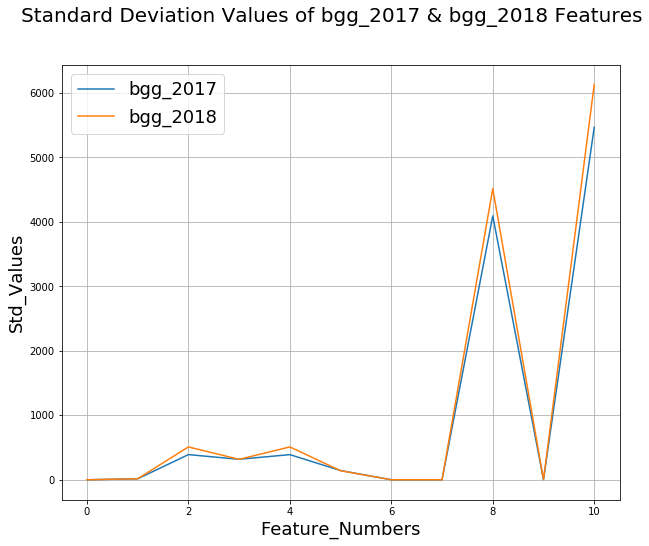

In [49]:
bgg_2017_stddev = [bgg_2017.select(functions.stddev(x)).collect()[0][0] for x in bgg_2017_feats]
bgg_2018_stddev = [bgg_2018.select(functions.stddev(x)).collect()[0][0] for x in bgg_2018_feats]
plt.figure(figsize=(10,8)).suptitle("Standard Deviation Values of bgg_2017 & bgg_2018 Features", fontsize=20)
plt.plot(range(len(bgg_2017_feats)), bgg_2017_stddev, label="bgg_2017")
plt.plot(range(len(bgg_2018_feats)), bgg_2018_stddev, label="bgg_2018")
plt.xlabel("Feature_Numbers", fontsize=18)
plt.ylabel("Std_Values", fontsize=18)
plt.autoscale(enable=True,axis='both',tight=False)
plt.grid(True)
plt.legend(fontsize=18)
plt.savefig("../../docs/CSC510_Assignment1_docs/bgg_stddev.jpeg")
plt.show()

**Histograms of the first feature, 'avg_rating', of bgg_2017 & bgg_2018 datasets.**

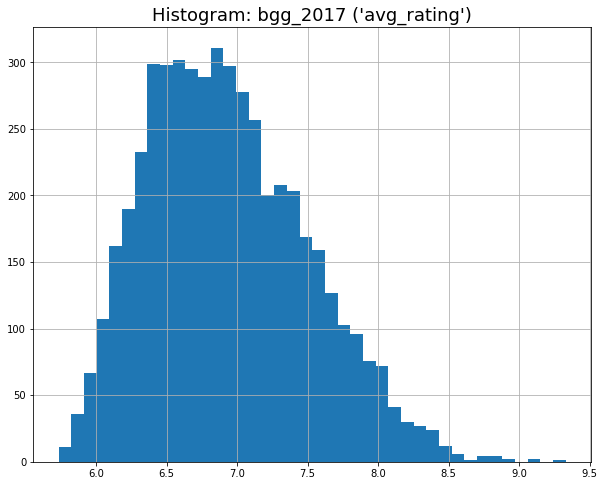

In [50]:
plt.figure(figsize=(10,8))
plt.title("Histogram: bgg_2017 ('avg_rating')", fontsize=18)
plt.hist([row["avg_rating"] for row in bgg_2017.select(bgg_2017["avg_rating"]).collect()], 40)
plt.grid(True)
plt.show()

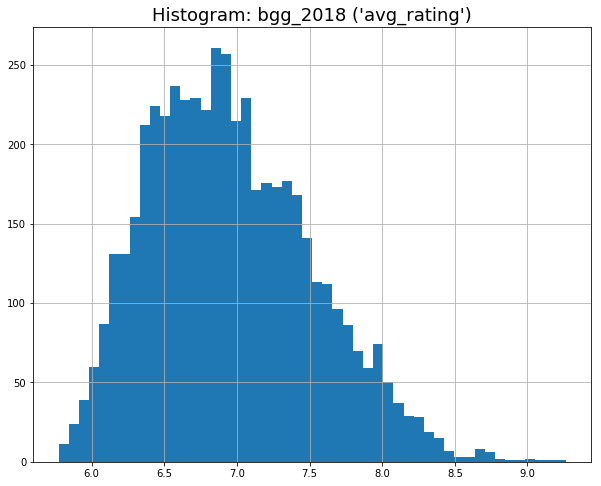

In [51]:
plt.figure(figsize=(10,8))
plt.title("Histogram: bgg_2018 ('avg_rating')", fontsize=18)
plt.hist([row["avg_rating"] for row in bgg_2018.select(bgg_2018["avg_rating"]).collect()], 50)
plt.grid(True)
plt.show()

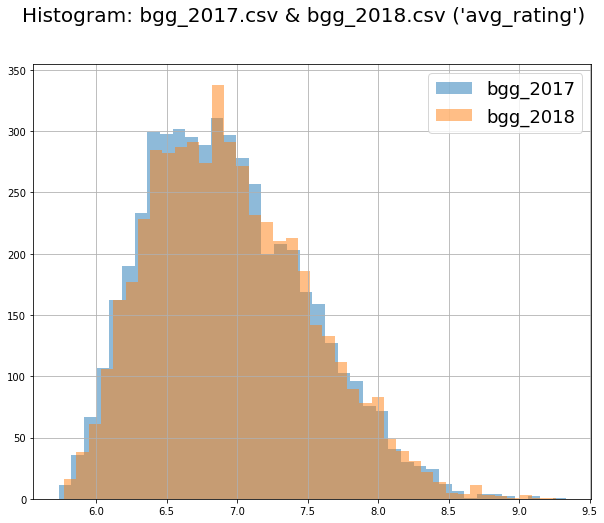

In [52]:
plt.figure(figsize=(10,8)).suptitle("Histogram: bgg_2017.csv & bgg_2018.csv ('avg_rating')", fontsize=20)
plt.hist([row["avg_rating"] for row in bgg_2017.select(bgg_2017["avg_rating"]).collect()], 40, alpha=0.5, label='bgg_2017')
plt.hist([row["avg_rating"] for row in bgg_2018.select(bgg_2018["avg_rating"]).collect()], 40, alpha=0.5, label='bgg_2018')
plt.legend(fontsize=18)
plt.grid(True)
plt.savefig("../../docs/CSC510_Assignment1_docs/bgg_hist01.jpeg")
plt.show()

**3D scatter-plot of the 'avg_rating', 'geek_rating', and 'num_votes' features of both bgg_2017 & bgg_2018 datasets.**

This visually demonstrates that the observations of each set have similar feature values.

/home/oakleyjm/anaconda3/envs/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


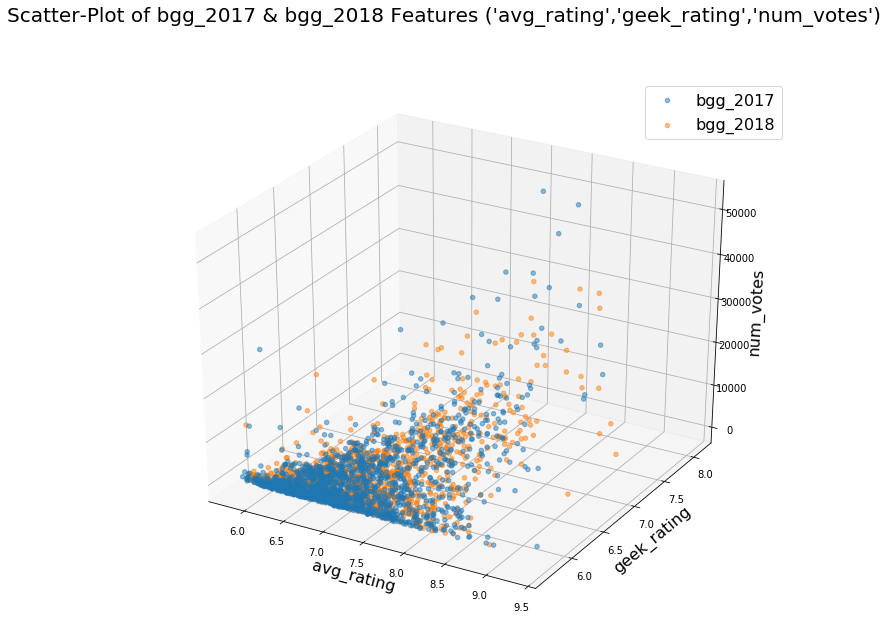

In [53]:
bgg_figure = plt.figure(figsize=(12,10))
bgg_ax = bgg_figure.add_subplot(111, projection='3d')
bgg_figure.suptitle("Scatter-Plot of bgg_2017 & bgg_2018 Features ('avg_rating','geek_rating','num_votes')", fontsize=20)

bgg_2017_sample = bgg_2017.sample(False, 0.3, 42)
bgg_2018_sample = bgg_2018.sample(False, 0.3, 42)

bgg_2017_xdata = [row["avg_rating"] for row in bgg_2017_sample.select(bgg_2017_sample["avg_rating"]).collect()]
bgg_2017_ydata = [row["geek_rating"] for row in bgg_2017_sample.select(bgg_2017_sample["geek_rating"]).collect()]
bgg_2017_zdata = [row["num_votes"] for row in bgg_2017_sample.select(bgg_2017_sample["num_votes"]).collect()]

bgg_2018_xdata = [row["avg_rating"] for row in bgg_2018_sample.select(bgg_2018_sample["avg_rating"]).collect()]
bgg_2018_ydata = [row["geek_rating"] for row in bgg_2018_sample.select(bgg_2018_sample["geek_rating"]).collect()]
bgg_2018_zdata = [row["num_votes"] for row in bgg_2018_sample.select(bgg_2018_sample["num_votes"]).collect()]

bgg_ax.scatter(bgg_2017_xdata, bgg_2017_ydata, bgg_2017_zdata, alpha=0.5, label='bgg_2017')
bgg_ax.scatter(bgg_2018_xdata, bgg_2018_ydata, bgg_2018_zdata, alpha=0.5, label='bgg_2018')

bgg_ax.set_xlabel("avg_rating", fontsize=16)
bgg_ax.set_ylabel("geek_rating", fontsize=16)
bgg_ax.set_zlabel("num_votes",fontsize=16)

bgg_ax.legend(fontsize=16)
bgg_figure.savefig("../../docs/CSC510_Assignment1_docs/bgg_3d01.jpeg")
bgg_figure.show()

**Normalize the features used in the previous 3D scatter-plot, then plot the histograms of the normalized 'avg_rating' feature from bgg_2017 & bgg_2018 datasets and the 3D scatter-plot of the three normalized features.**

In [54]:
norm_bgg_2017 = bgg_2017.withColumn('norm_avg_rating', (bgg_2017.avg_rating - bgg_2017.select(functions.mean(bgg_2017.avg_rating)).collect()[0][0]) / bgg_2017.select(functions.stddev(bgg_2017.avg_rating)).collect()[0][0])
norm_bgg_2018 = bgg_2018.withColumn('norm_avg_rating', (bgg_2018.avg_rating - bgg_2018.select(functions.mean(bgg_2018.avg_rating)).collect()[0][0]) / bgg_2018.select(functions.stddev(bgg_2018.avg_rating)).collect()[0][0])

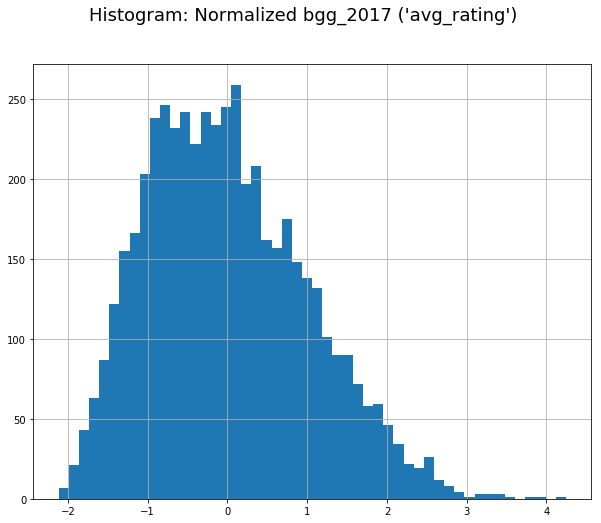

In [55]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Normalized bgg_2017 ('avg_rating')", fontsize=18)
plt.hist([row["norm_avg_rating"] for row in norm_bgg_2017.select(norm_bgg_2017["norm_avg_rating"]).collect()], 50)
plt.grid(True)
plt.show()

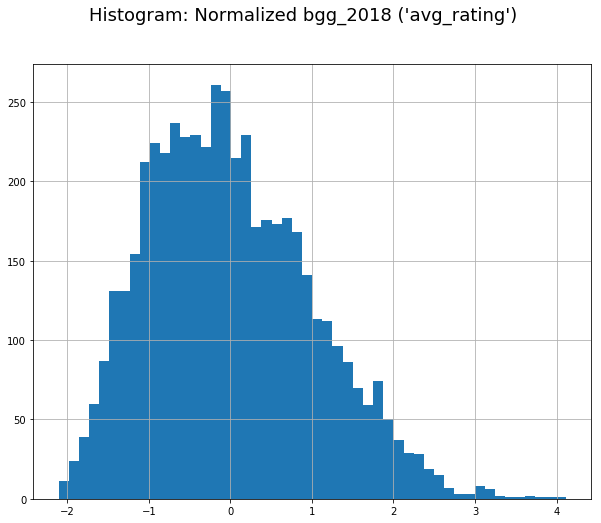

In [56]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Normalized bgg_2018 ('avg_rating')", fontsize=18)
plt.hist([row["norm_avg_rating"] for row in norm_bgg_2018.select(norm_bgg_2018["norm_avg_rating"]).collect()], 50)
plt.grid(True)
plt.show()

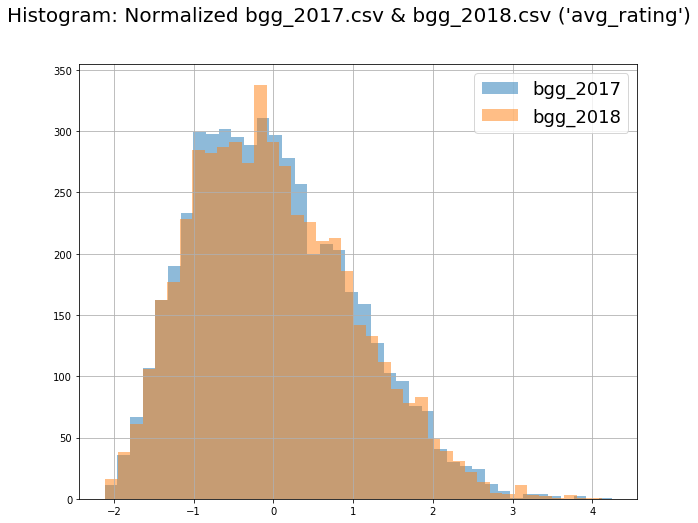

In [57]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Normalized bgg_2017.csv & bgg_2018.csv ('avg_rating')", fontsize=20)
plt.hist([row["norm_avg_rating"] for row in norm_bgg_2017.select(norm_bgg_2017["norm_avg_rating"]).collect()], 40, alpha=0.5, label='bgg_2017')
plt.hist([row["norm_avg_rating"] for row in norm_bgg_2018.select(norm_bgg_2018["norm_avg_rating"]).collect()], 40, alpha=0.5, label='bgg_2018')
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

In [58]:
norm_bgg_2017_ar = bgg_2017_sample.withColumn('norm_avg_rating',
                                              (bgg_2017_sample.avg_rating
                                               - bgg_2017_sample.select(functions.mean(bgg_2017_sample.avg_rating)).collect()[0][0])
                                              / bgg_2017_sample.select(functions.stddev(bgg_2017_sample.avg_rating)).collect()[0][0])
norm_bgg_2018_ar = bgg_2018_sample.withColumn('norm_avg_rating',
                                              (bgg_2018_sample.avg_rating
                                               - bgg_2018_sample.select(functions.mean(bgg_2018_sample.avg_rating)).collect()[0][0])
                                              / bgg_2018_sample.select(functions.stddev(bgg_2018_sample.avg_rating)).collect()[0][0])

norm_bgg_2017_gr = bgg_2017_sample.withColumn('norm_geek_rating',
                                              (bgg_2017_sample.geek_rating
                                               - bgg_2017_sample.select(functions.mean(bgg_2017_sample.geek_rating)).collect()[0][0])
                                              / bgg_2017_sample.select(functions.stddev(bgg_2017_sample.geek_rating)).collect()[0][0])
norm_bgg_2018_gr = bgg_2018_sample.withColumn('norm_geek_rating',
                                              (bgg_2018_sample.geek_rating
                                               - bgg_2018_sample.select(functions.mean(bgg_2018_sample.geek_rating)).collect()[0][0])
                                              / bgg_2018_sample.select(functions.stddev(bgg_2018_sample.geek_rating)).collect()[0][0])

norm_bgg_2017_nv = bgg_2017_sample.withColumn('norm_num_votes',
                                              (bgg_2017_sample.num_votes
                                               - bgg_2017_sample.select(functions.mean(bgg_2017_sample.num_votes)).collect()[0][0])
                                              / bgg_2017_sample.select(functions.stddev(bgg_2017_sample.num_votes)).collect()[0][0])
norm_bgg_2018_nv = bgg_2018_sample.withColumn('norm_num_votes',
                                              (bgg_2018_sample.num_votes
                                               - bgg_2018_sample.select(functions.mean(bgg_2018_sample.num_votes)).collect()[0][0])
                                              / bgg_2018_sample.select(functions.stddev(bgg_2018_sample.num_votes)).collect()[0][0])

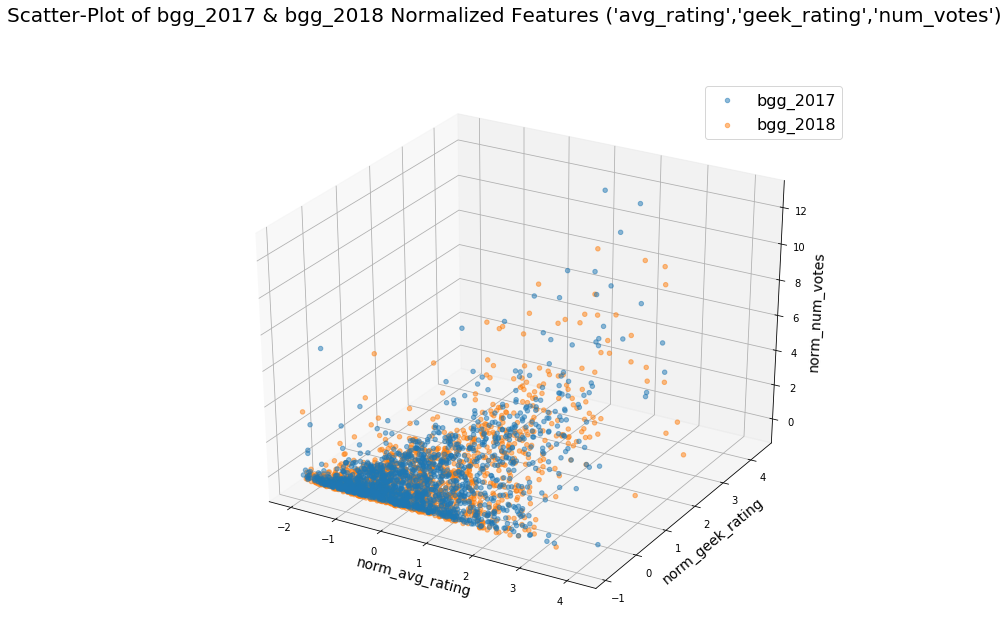

In [59]:
norm_bgg_figure = plt.figure(figsize=(12,10))
norm_bgg_ax = norm_bgg_figure.add_subplot(111, projection='3d')
norm_bgg_figure.suptitle("Scatter-Plot of bgg_2017 & bgg_2018 Normalized Features ('avg_rating','geek_rating','num_votes')", fontsize=20)

norm_bgg_2017_xdata = [row["norm_avg_rating"] for row in norm_bgg_2017_ar.select(norm_bgg_2017_ar["norm_avg_rating"]).collect()]
norm_bgg_2017_ydata = [row["norm_geek_rating"] for row in norm_bgg_2017_gr.select(norm_bgg_2017_gr["norm_geek_rating"]).collect()]
norm_bgg_2017_zdata = [row["norm_num_votes"] for row in norm_bgg_2017_nv.select(norm_bgg_2017_nv["norm_num_votes"]).collect()]

norm_bgg_2018_xdata = [row["norm_avg_rating"] for row in norm_bgg_2018_ar.select(norm_bgg_2018_ar["norm_avg_rating"]).collect()]
norm_bgg_2018_ydata = [row["norm_geek_rating"] for row in norm_bgg_2018_gr.select(norm_bgg_2018_gr["norm_geek_rating"]).collect()]
norm_bgg_2018_zdata = [row["norm_num_votes"] for row in norm_bgg_2018_nv.select(norm_bgg_2018_nv["norm_num_votes"]).collect()]

norm_bgg_ax.scatter(norm_bgg_2017_xdata, norm_bgg_2017_ydata, norm_bgg_2017_zdata, alpha=0.5, label='bgg_2017')
norm_bgg_ax.scatter(norm_bgg_2018_xdata, norm_bgg_2018_ydata, norm_bgg_2018_zdata, alpha=0.5, label='bgg_2018')

norm_bgg_ax.set_xlabel("norm_avg_rating", fontsize=14)
norm_bgg_ax.set_ylabel("norm_geek_rating", fontsize=14)
norm_bgg_ax.set_zlabel("norm_num_votes",fontsize=14)

norm_bgg_ax.legend(fontsize=16)
norm_bgg_figure.show()

**Standardize the features used in the previous 3D scatter-plot, then plot the histograms of the standardized first feature from bgg_2017 & bg_2018 datasets and the 3D scatter-plot of the three standardized features.**

In [60]:
alpha = 0.00001
std_bgg_2017 = norm_bgg_2017.withColumn('std_avg_rating', (alpha*norm_bgg_2017.select(functions.mean(norm_bgg_2017.norm_avg_rating)).collect()[0][0])
                                        + ((norm_bgg_2017.norm_avg_rating - norm_bgg_2017.select(functions.mean(norm_bgg_2017.norm_avg_rating)).collect()[0][0])
                                           / (1 + norm_bgg_2017.select(functions.stddev(norm_bgg_2017.norm_avg_rating)).collect()[0][0])))
std_bgg_2018 = norm_bgg_2018.withColumn('std_avg_rating', (alpha*norm_bgg_2018.select(functions.mean(norm_bgg_2018.norm_avg_rating)).collect()[0][0]) 
                                        + ((norm_bgg_2018.norm_avg_rating - norm_bgg_2018.select(functions.mean(norm_bgg_2018.norm_avg_rating)).collect()[0][0])
                                           / (1 + norm_bgg_2018.select(functions.stddev(norm_bgg_2018.norm_avg_rating)).collect()[0][0])))

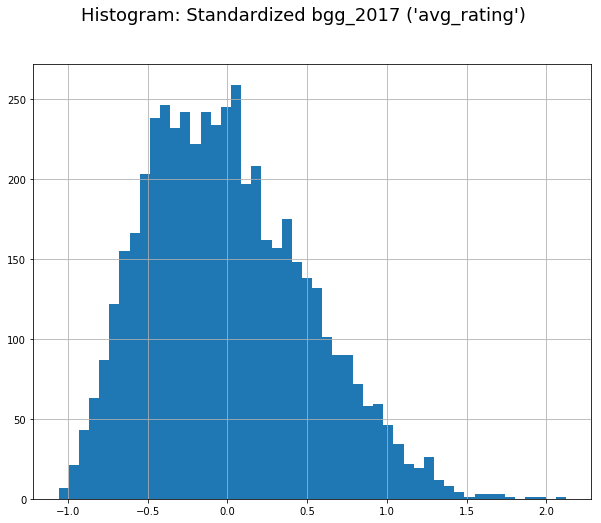

In [61]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Standardized bgg_2017 ('avg_rating')", fontsize=18)
plt.hist([row["std_avg_rating"] for row in std_bgg_2017.select(std_bgg_2017["std_avg_rating"]).collect()], 50)
plt.grid(True)
plt.show()

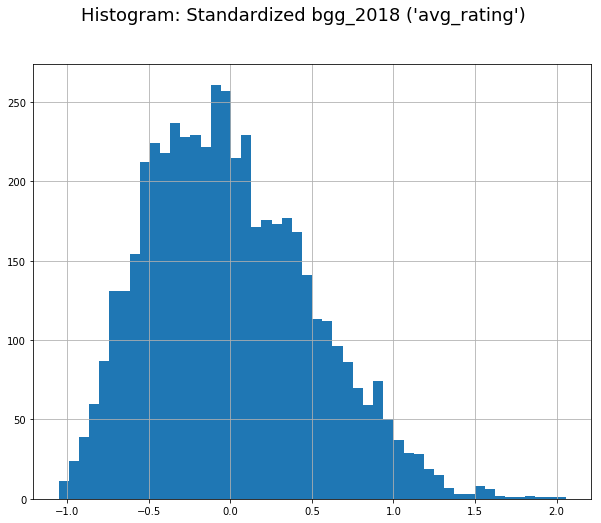

In [62]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Standardized bgg_2018 ('avg_rating')", fontsize=18)
plt.hist([row["std_avg_rating"] for row in std_bgg_2018.select(std_bgg_2018["std_avg_rating"]).collect()], 50)
plt.grid(True)
plt.show()

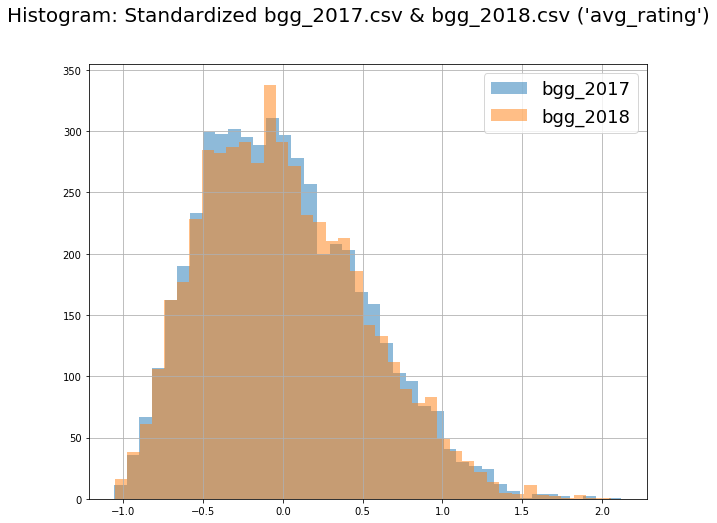

In [63]:
plt.figure(figsize=(10,8)).suptitle("Histogram: Standardized bgg_2017.csv & bgg_2018.csv ('avg_rating')", fontsize=20)
plt.hist([row["std_avg_rating"] for row in std_bgg_2017.select(std_bgg_2017["std_avg_rating"]).collect()], 40, alpha=0.5, label='bgg_2017')
plt.hist([row["std_avg_rating"] for row in std_bgg_2018.select(std_bgg_2018["std_avg_rating"]).collect()], 40, alpha=0.5, label='bgg_2018')
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

In [64]:
std_bgg_2017_ar = norm_bgg_2017_ar.withColumn('std_avg_rating',
                                              (alpha*norm_bgg_2017_ar.select(functions.mean(norm_bgg_2017_ar.norm_avg_rating)).collect()[0][0])
                                              + ((norm_bgg_2017_ar.norm_avg_rating - norm_bgg_2017_ar.select(functions.mean(norm_bgg_2017_ar.norm_avg_rating)).collect()[0][0])
                                                 / (1 + norm_bgg_2017_ar.select(functions.stddev(norm_bgg_2017_ar.norm_avg_rating)).collect()[0][0])))
std_bgg_2018_ar = norm_bgg_2018_ar.withColumn('std_avg_rating', (alpha*norm_bgg_2018_ar.select(functions.mean(norm_bgg_2018_ar.norm_avg_rating)).collect()[0][0])
                                              + ((norm_bgg_2018_ar.norm_avg_rating - norm_bgg_2018_ar.select(functions.mean(norm_bgg_2018_ar.norm_avg_rating)).collect()[0][0])
                                                 / (1 + norm_bgg_2018_ar.select(functions.stddev(norm_bgg_2018_ar.norm_avg_rating)).collect()[0][0])))

std_bgg_2017_gr = norm_bgg_2017_gr.withColumn('std_geek_rating',
                                              (alpha*norm_bgg_2017_gr.select(functions.mean(norm_bgg_2017_gr.norm_geek_rating)).collect()[0][0])
                                              + ((norm_bgg_2017_gr.norm_geek_rating - norm_bgg_2017_gr.select(functions.mean(norm_bgg_2017_gr.norm_geek_rating)).collect()[0][0])
                                                 / (1 + norm_bgg_2017_gr.select(functions.stddev(norm_bgg_2017_gr.norm_geek_rating)).collect()[0][0])))
std_bgg_2018_gr = norm_bgg_2018_gr.withColumn('std_geek_rating',
                                              (alpha*norm_bgg_2018_gr.select(functions.mean(norm_bgg_2018_gr.norm_geek_rating)).collect()[0][0])
                                              + ((norm_bgg_2018_gr.norm_geek_rating - norm_bgg_2018_gr.select(functions.mean(norm_bgg_2018_gr.norm_geek_rating)).collect()[0][0])
                                                 / (1 + norm_bgg_2018_gr.select(functions.stddev(norm_bgg_2018_gr.norm_geek_rating)).collect()[0][0])))

std_bgg_2017_nv = norm_bgg_2017_nv.withColumn('std_num_votes',
                                              (alpha*norm_bgg_2017_nv.select(functions.mean(norm_bgg_2017_nv.num_votes)).collect()[0][0])
                                              + ((norm_bgg_2017_nv.num_votes - norm_bgg_2017_nv.select(functions.mean(norm_bgg_2017_nv.num_votes)).collect()[0][0])
                                                 / (1 + norm_bgg_2017_nv.select(functions.stddev(norm_bgg_2017_nv.num_votes)).collect()[0][0])))
std_bgg_2018_nv = norm_bgg_2018_nv.withColumn('std_num_votes',
                                              (alpha*norm_bgg_2018_nv.select(functions.mean(norm_bgg_2018_nv.num_votes)).collect()[0][0])
                                              + ((norm_bgg_2018_nv.num_votes - norm_bgg_2018_nv.select(functions.mean(norm_bgg_2018_nv.num_votes)).collect()[0][0])
                                                 / (1 + norm_bgg_2018_nv.select(functions.stddev(norm_bgg_2018_nv.num_votes)).collect()[0][0])))

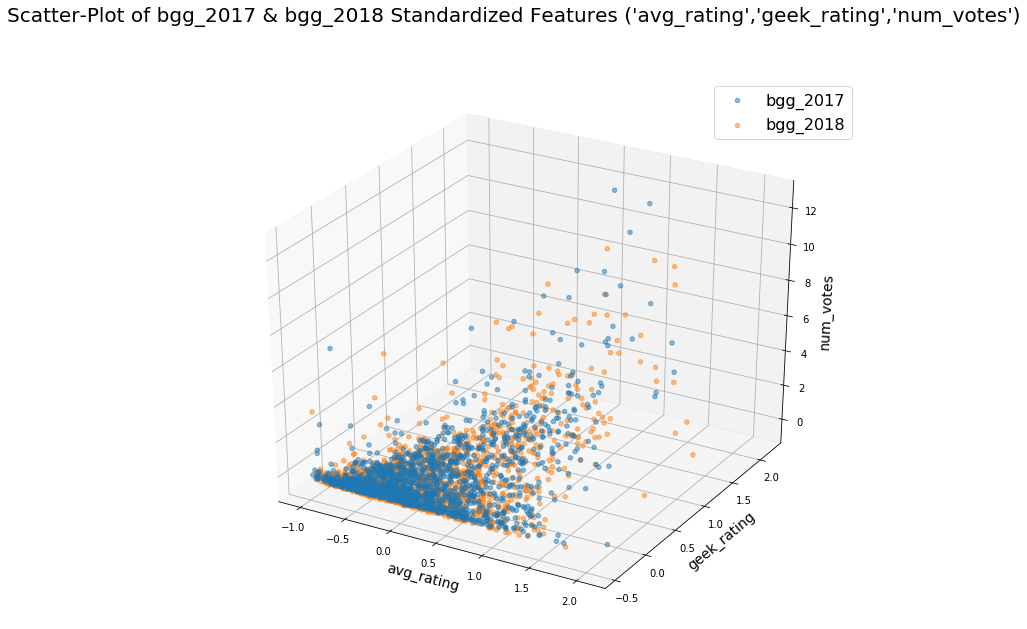

In [65]:
std_bgg_figure = plt.figure(figsize=(12,10))
std_bgg_ax = std_bgg_figure.add_subplot(111, projection='3d')
std_bgg_figure.suptitle("Scatter-Plot of bgg_2017 & bgg_2018 Standardized Features ('avg_rating','geek_rating','num_votes')", fontsize=20)

std_bgg_2017_xdata = [row["std_avg_rating"] for row in std_bgg_2017_ar.select(std_bgg_2017_ar["std_avg_rating"]).collect()]
std_bgg_2017_ydata = [row["std_geek_rating"] for row in std_bgg_2017_gr.select(std_bgg_2017_gr["std_geek_rating"]).collect()]
std_bgg_2017_zdata = [row["std_num_votes"] for row in std_bgg_2017_nv.select(std_bgg_2017_nv["std_num_votes"]).collect()]

std_bgg_2018_xdata = [row["std_avg_rating"] for row in std_bgg_2018_ar.select(std_bgg_2018_ar["std_avg_rating"]).collect()]
std_bgg_2018_ydata = [row["std_geek_rating"] for row in std_bgg_2018_gr.select(std_bgg_2018_gr["std_geek_rating"]).collect()]
std_bgg_2018_zdata = [row["std_num_votes"] for row in std_bgg_2018_nv.select(std_bgg_2018_nv["std_num_votes"]).collect()]

std_bgg_ax.scatter(std_bgg_2017_xdata, std_bgg_2017_ydata, std_bgg_2017_zdata, alpha=0.5, label='bgg_2017')
std_bgg_ax.scatter(std_bgg_2018_xdata, std_bgg_2018_ydata, std_bgg_2018_zdata, alpha=0.5, label='bgg_2018')

std_bgg_ax.set_xlabel("avg_rating", fontsize=14)
std_bgg_ax.set_ylabel("geek_rating", fontsize=14)
std_bgg_ax.set_zlabel("num_votes",fontsize=14)

std_bgg_ax.legend(fontsize=16)
std_bgg_figure.show()

**2D scatter-plots of the original, normalized, and standardized versions of the 'avg_rating', 'geek_rating', and 'num_votes' features from the bgg_2017 & bgg_2018 datasets.**

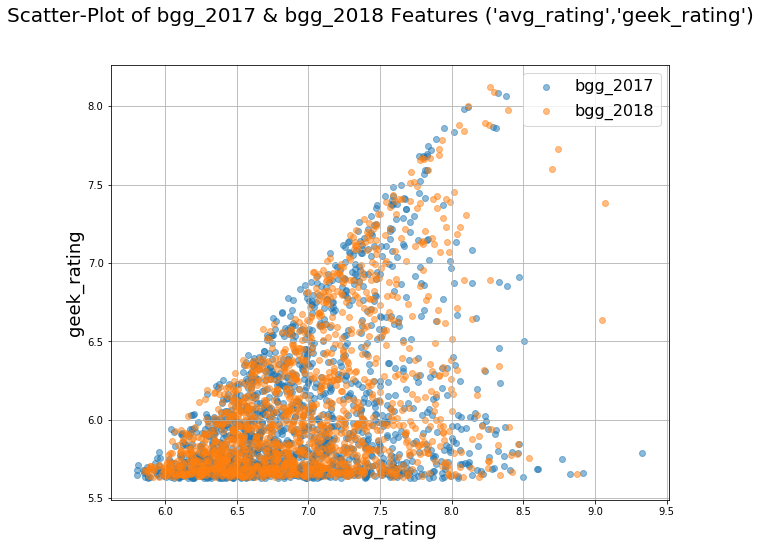

In [66]:
plt.figure(figsize=(10,8)).suptitle("Scatter-Plot of bgg_2017 & bgg_2018 Features ('avg_rating','geek_rating')", fontsize=20)
plt.scatter(bgg_2017_xdata, bgg_2017_ydata, alpha=0.5, label='bgg_2017')
plt.scatter(bgg_2018_xdata, bgg_2018_ydata, alpha=0.5, label='bgg_2018')
plt.xlabel("avg_rating", fontsize=18)
plt.ylabel("geek_rating", fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

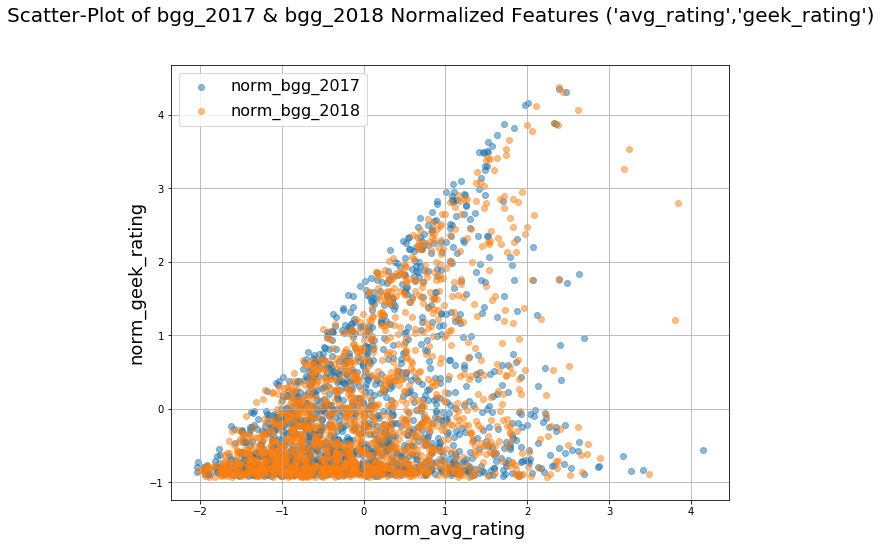

In [67]:
plt.figure(figsize=(10,8)).suptitle("Scatter-Plot of bgg_2017 & bgg_2018 Normalized Features ('avg_rating','geek_rating')", fontsize=20)
plt.scatter(norm_bgg_2017_xdata, norm_bgg_2017_ydata, alpha=0.5, label='norm_bgg_2017')
plt.scatter(norm_bgg_2018_xdata, norm_bgg_2018_ydata, alpha=0.5, label='norm_bgg_2018')
plt.xlabel("norm_avg_rating", fontsize=18)
plt.ylabel("norm_geek_rating", fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

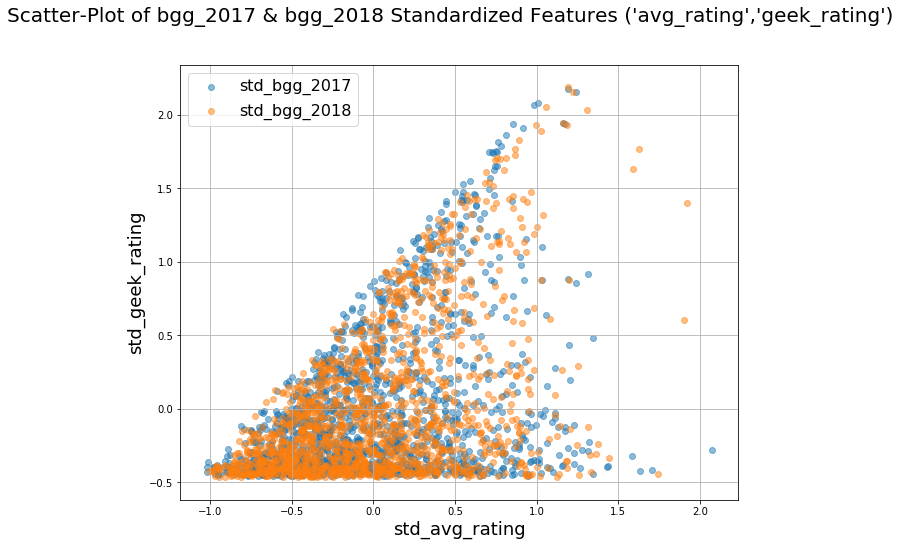

In [68]:
plt.figure(figsize=(10,8)).suptitle("Scatter-Plot of bgg_2017 & bgg_2018 Standardized Features ('avg_rating','geek_rating')", fontsize=20)
plt.scatter(std_bgg_2017_xdata, std_bgg_2017_ydata, alpha=0.5, label='std_bgg_2017')
plt.scatter(std_bgg_2018_xdata, std_bgg_2018_ydata, alpha=0.5, label='std_bgg_2018')
plt.xlabel("std_avg_rating", fontsize=18)
plt.ylabel("std_geek_rating", fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

**End the SparkContext Session.**

In [69]:
sc.stop()